In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
boston = keras.datasets.boston_housing
(x_train, y_train), (x_test,y_test) = boston.load_data()

57344/57026 [==============================] - 0s 1us/step


In [4]:
#shuffle the data
order = np.argsort(np.random.random(y_train.shape))
x_train = x_train[order]
y_train = y_train[order]

In [6]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [7]:
type(x_train)

numpy.ndarray

In [8]:
column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'pratio', 'b', 'lstat']
df = pd.DataFrame(x_train, columns=column_names)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pratio,b,lstat
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [10]:
y_train[0:10]

array([32. , 27.5, 32. , 23.1, 50. , 20.6, 22.6, 36.2, 21.8, 19.5])

In [11]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [12]:
# building the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu, input_shape=(x_train.shape[1],)))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1))

In [13]:
#compile the model
model.compile(optimizer=tf.train.RMSPropOptimizer(0.001),
             loss='mse',
             metrics=['mae'])

In [16]:
ckpt_model = 'boston-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [36]:
print('Starting training...')
history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=200,
                    callbacks=callbacks_list,
                    verbose=0)

Starting training...


/home/heenal/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


In [32]:
loss, mae = model.evaluate(x_test, y_test)
loss, mae

102/102 [==============================] - 0s 67us/step


(23.992682662664674, 3.155940700979794)

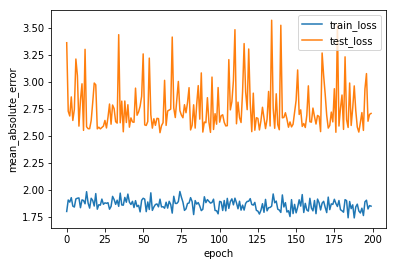

In [33]:
# Model accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
#plt.title('Model Accuracy')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'])
plt.show()

In [34]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

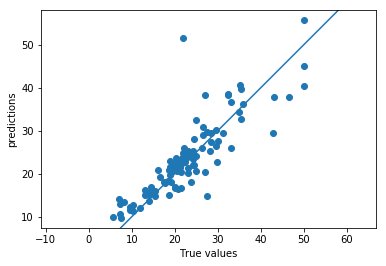

In [38]:
test_predictions = model.predict(x_test).flatten()
plt.scatter(y_test, test_predictions)
plt.xlabel('True values')
plt.ylabel('predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100,100],[-100,100])

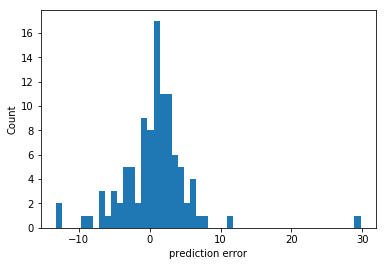

In [41]:
error = test_predictions - y_test
plt.hist(error,bins=50)
plt.xlabel('prediction error')
_=plt.ylabel('Count')